In [1]:
import sys
sys.path.append("../")

In [2]:
from torchvision import transforms

In [3]:
from src.dataset.custom_dataset import OdometerDataset

In [ ]:
data_dir = '/home/yannou/OneDrive/Documents/3_PRO/carviz/data/odometer_reader/milestone_box'
labels_file = '/home/yannou/OneDrive/Documents/3_PRO/carviz/data/odometer_reader/milestone_box/milestone_labels.json'


transform = transforms.Compose([
    transforms.RandomRotation(10),  
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), 
    transforms.Grayscale(num_output_channels=1),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  
])



In [5]:
dataset = OdometerDataset(root_dir=data_dir, split="train", labels_file=labels_file, img_height=32, img_width=100, transform=transform)

In [6]:
len(dataset)

3059

In [7]:
dataset[0]

(tensor([[[-0.9686,  0.2078,  0.1922,  ..., -0.9686, -0.9686, -0.9686],
          [-0.9686,  0.2000,  0.1922,  ..., -0.9686, -0.9686, -0.9686],
          [-0.9686,  0.2000,  0.1922,  ...,  0.1843,  0.1843,  0.1922],
          ...,
          [ 0.1529,  0.1765,  0.1765,  ...,  0.2235,  0.2157, -0.9686],
          [-0.9686, -0.9686, -0.9686,  ...,  0.2000,  0.2078, -0.9686],
          [-0.9686, -0.9686, -0.9686,  ...,  0.1686,  0.1608, -0.9686]]]),
 tensor([ 1,  8,  9,  7, 10, 10]),
 tensor([6]))

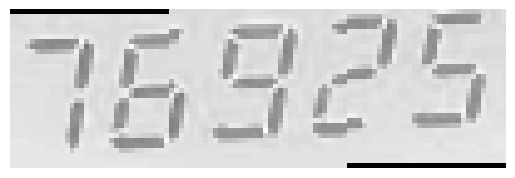

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import ToPILImage

# Récupérer l'image, le label et la longueur du label pour dataset[0]
image_tensor, target_tensor, target_length_tensor = dataset[6]

# Inverser la normalisation (pour revenir aux valeurs originales)
# Pour un seul canal (grayscale), la moyenne est 0.5 et l'écart-type est 0.5
image_tensor = (image_tensor * 0.5) + 0.5  # Inverser la normalisation (de [-1, 1] à [0, 1])

# Convertir le tensor en image PIL
to_pil = ToPILImage()
image_pil = to_pil(image_tensor.squeeze(0))  # Enlever la dimension supplémentaire (channel)

# Afficher l'image avec matplotlib
plt.imshow(image_pil, cmap='gray')  # 'gray' pour l'affichage en niveaux de gris
plt.axis('off')  # Ne pas afficher les axes
plt.show()
